# Autour du SARS-CoV-2 (Covid-19)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

J'utilise l'url car j'ai des soucis pour charger un fichier depuis Jupiter.

Jupiter va chercher dans les dossiers du serveur herbergeant, et non sur mon pc.

In [2]:
 data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

## Préparation des données

In [7]:
df = pd.read_csv(data_url)
df

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN              Antarctica   
6                                             NaN     Antigua and Barbuda   
7                                             NaN               Argentina   
8                                             NaN                 Armenia   
9                    Australian Capital Territory               Australia   
10                                New South Wales               Australia   
11                             Northern Territory               Australia   
12                                     Queensland               Australia   
13                                South Australia               Australia   
14                                       Tasmania               Australia   
15                                       Victoria               Australia   
16                              Western Australia               Australia   
17                                            NaN                 Austria   
18                                            NaN              Azerbaijan   
19                                            NaN                 Bahamas   
20                                            NaN                 Bahrain   
21                                            NaN              Bangladesh   
22                                            NaN                Barbados   
23                                            NaN                 Belarus   
24                                            NaN                 Belgium   
25                                            NaN                  Belize   
26                                            NaN                   Benin   
27                                            NaN                  Bhutan   
28                                            NaN                 Bolivia   
29                                            NaN  Bosnia and Herzegovina   
..                                            ...                     ...   
259                                           NaN                  Tuvalu   
260                                           NaN                      US   
261                                           NaN                  Uganda   
262                                           NaN                 Ukraine   
263                                           NaN    United Arab Emirates   
264                                      Anguilla          United Kingdom   
265                                       Bermuda          United Kingdom   
266                        British Virgin Islands          United Kingdom   
267                                Cayman Islands          United Kingdom   
268                               Channel Islands          United Kingdom   
269                   Falkland Islands (Malvinas)          United Kingdom   
270                                     Gibraltar          United Kingdom   
271                                      Guernsey          United Kingdom   
272                                   Isle of Man          United Kingdom   
273                                        Jersey          United Kingdom   
274                                    Montserrat          United Kingdom   
275                              Pitcairn Islands          United Kingdom   
276  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
277                      Turks and Caicos Islands          United Kingdom   
278                                           NaN          United Kingdom   
279                            

Tout les pays n'ont pas forcément de donnée dans Province/State : ce qui est normal. On cherche néanmoins à savoir si d'autres column ont des données manquantes.

In [8]:
col_excluded = ['Province/State']

df.loc[df[df.columns ^ col_excluded].isnull().any(axis=1)]

Province/State Country/Region  Lat  Long  1/22/20  1/23/20  \
53  Repatriated Travellers         Canada  NaN   NaN        0        0   
89                 Unknown          China  NaN   NaN        0        0   

    1/24/20  1/25/20  1/26/20  1/27/20    ...     11/18/22  11/19/22  \
53        0        0        0        0    ...           13        13   
89        0        0        0        0    ...       937229    979901   

    11/20/22  11/21/22  11/22/22  11/23/22  11/24/22  11/25/22  11/26/22  \
53        13        13        13        13        13        13        13   
89   1003837   1029140   1029140   1080817   1080817   1109947   1140944   

    11/27/22  
53        13  
89   1175688  

[2 rows x 1045 columns]

Deux lignes n'ont pas de Latitude et de Longitude. Cela correspond aux canadiens raptriés et à des chinois dont la province est inconnue.

Nous éliminons ces deux lignes.

In [9]:
df_clean = df[df['Lat'].notna()]
df_clean

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN              Antarctica   
6                                             NaN     Antigua and Barbuda   
7                                             NaN               Argentina   
8                                             NaN                 Armenia   
9                    Australian Capital Territory               Australia   
10                                New South Wales               Australia   
11                             Northern Territory               Australia   
12                                     Queensland               Australia   
13                                South Australia               Australia   
14                                       Tasmania               Australia   
15                                       Victoria               Australia   
16                              Western Australia               Australia   
17                                            NaN                 Austria   
18                                            NaN              Azerbaijan   
19                                            NaN                 Bahamas   
20                                            NaN                 Bahrain   
21                                            NaN              Bangladesh   
22                                            NaN                Barbados   
23                                            NaN                 Belarus   
24                                            NaN                 Belgium   
25                                            NaN                  Belize   
26                                            NaN                   Benin   
27                                            NaN                  Bhutan   
28                                            NaN                 Bolivia   
29                                            NaN  Bosnia and Herzegovina   
..                                            ...                     ...   
259                                           NaN                  Tuvalu   
260                                           NaN                      US   
261                                           NaN                  Uganda   
262                                           NaN                 Ukraine   
263                                           NaN    United Arab Emirates   
264                                      Anguilla          United Kingdom   
265                                       Bermuda          United Kingdom   
266                        British Virgin Islands          United Kingdom   
267                                Cayman Islands          United Kingdom   
268                               Channel Islands          United Kingdom   
269                   Falkland Islands (Malvinas)          United Kingdom   
270                                     Gibraltar          United Kingdom   
271                                      Guernsey          United Kingdom   
272                                   Isle of Man          United Kingdom   
273                                        Jersey          United Kingdom   
274                                    Montserrat          United Kingdom   
275                              Pitcairn Islands          United Kingdom   
276  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
277                      Turks and Caicos Islands          United Kingdom   
278                                           NaN          United Kingdom   
279                            

On vérifie que df_clean ne contient plus les lignes avec données manquantes:

In [11]:
col_excluded = ['Province/State']

df_clean.loc[df_clean[df_clean.columns ^ col_excluded].isnull().any(axis=1)]

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, ...]
Index: []

[0 rows x 1045 columns]

## Premiers graphes

On récupère les colomnes de date pour en faire les abscisses du graphe:

In [18]:
x = df_clean.columns[4:].tolist()
x

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',
 '4/12/20',
 '4/13/20',
 '4/14/20',
 '4/15/20',
 '4/16/

Concernant Hong Kong, est-ce une pays ou une province de la Chine ?

On voit ci-dessous que c'est une province.

In [24]:
df_clean.loc[df_clean['Country/Region'] =="China"]

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
59           Anhui          China  31.8257  117.2264        1        9   
60         Beijing          China  40.1824  116.4142       14       22   
61       Chongqing          China  30.0572  107.8740        6        9   
62          Fujian          China  26.0789  117.9874        1        5   
63           Gansu          China  35.7518  104.2861        0        2   
64       Guangdong          China  23.3417  113.4244       26       32   
65         Guangxi          China  23.8298  108.7881        2        5   
66         Guizhou          China  26.8154  106.8748        1        3   
67          Hainan          China  19.1959  109.7453        4        5   
68           Hebei          China  39.5490  116.1306        1        1   
69    Heilongjiang          China  47.8620  127.7615        0        2   
70           Henan          China  37.8957  114.9042        5        5   
71       Hong Kong          China  22.3000  114.2000        0        2   
72           Hubei          China  30.9756  112.2707      444      444   
73           Hunan          China  27.6104  111.7088        4        9   
74  Inner Mongolia          China  44.0935  113.9448        0        0   
75         Jiangsu          China  32.9711  119.4550        1        5   
76         Jiangxi          China  27.6140  115.7221        2        7   
77           Jilin          China  43.6661  126.1923        0        1   
78        Liaoning          China  41.2956  122.6085        2        3   
79           Macau          China  22.1667  113.5500        1        2   
80         Ningxia          China  37.2692  106.1655        1        1   
81         Qinghai          China  35.7452   95.9956        0        0   
82         Shaanxi          China  35.1917  108.8701        0        3   
83        Shandong          China  36.3427  118.1498        2        6   
84        Shanghai          China  31.2020  121.4491        9       16   
85          Shanxi          China  37.5777  112.2922        1        1   
86         Sichuan          China  30.6171  102.7103        5        8   
87         Tianjin          China  39.3054  117.3230        4        4   
88           Tibet          China  31.6927   88.0924        0        0   
90        Xinjiang          China  41.1129   85.2401        0        2   
91          Yunnan          China  24.9740  101.4870        1        2   
92        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20    ...     11/18/22  11/19/22  \
59       15       39       60       70    ...         1566      1566   
60       36       41       68       80    ...         6504      6578   
61       27       57       75      110    ...         3313      3498   
62       10       18       35       59    ...         5562      5617   
63        2        4        7       14    ...         1480      1483   
64       53       78      111      151    ...        22507     23685   
65       23       23       36       46    ...         2351      2357   
66        3        4        5        7    ...         1048      1059   
67        8       19       22       33    ...         9003      9003   
68        2        8       13       18    ...         2057      2066   
69        4        9       15       21    ...         3676      3697   
70        9       32       83      128    ...         5440      5818   
71        2        5        8        8    ...      2020885   2028945   
72      549      761     1058     1423    ...        68463     68470   
73       24       43       69      100    ...         1861      1869   
74        1        7        7       11    ...         6475      6574   
75        9       18       33       47    ...         2913      2987   
76       18       18       36       72    ...         1506      1506   
77        3        4        4        6    ...        40330     40330   
78        4       17       21       27    ...  

Et concernant la Corée ?

Cette fois, pas de province.

In [25]:
df_clean.loc[df_clean['Country/Region'] =="Korea, South"]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
162            NaN   Korea, South  35.907757  127.766922        1        1   

     1/24/20  1/25/20  1/26/20  1/27/20    ...     11/18/22  11/19/22  \
162        2        2        3        4    ...     26512754  26558765   

     11/20/22  11/21/22  11/22/22  11/23/22  11/24/22  11/25/22  11/26/22  \
162  26581856  26654729  26725053  26784142  26837840  26890488  26937516   

     11/27/22  
162  26959843  

[1 rows x 1045 columns]

La Hollande a-t'elle des colonies en tant que province ?

Oui, il faudra donc sélectionner celle-ci pour les provinces nulles.

In [26]:
df_clean.loc[df_clean['Country/Region'] =="Netherlands"]

Province/State Country/Region      Lat     Long  \
196                             Aruba    Netherlands  12.5211 -69.9683   
197  Bonaire, Sint Eustatius and Saba    Netherlands  12.1784 -68.2385   
198                           Curacao    Netherlands  12.1696 -68.9900   
199                      Sint Maarten    Netherlands  18.0425 -63.0548   
200                               NaN    Netherlands  52.1326   5.2913   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20    ...     11/18/22  \
196        0        0        0        0        0        0    ...        43494   
197        0        0        0        0        0        0    ...        11516   
198        0        0        0        0        0        0    ...        45536   
199        0        0        0        0        0        0    ...        10943   
200        0        0        0        0        0        0    ...      8534013   

     11/19/22  11/20/22  11/21/22  11/22/22  11/23/22  11/24/22  11/25/22  \
196     43494     43494     43494     43494     43568     43568     43568   
197     11516     11516     11516     11516     11544     11544     11544   
198     45536     45536     45536     45536     45559     45559     45559   
199     10943     10943     10943     10943     10949     10949     10949   
200   8534013   8534013   8534013   8536718   8536718   8536718   8539165   

     11/26/22  11/27/22  
196     43568     43568  
197     11544     11544  
198     45559     45559  
199     10949     10949  
200   8539165   8539165  

[5 rows x 1045 columns]

Preparation des pays et provinces à traiter + exclusion des provinces à exclures:

In [40]:
countries = ["Belgium","China","France","Germany","Iran","Italy","Japan","Korea, South","Netherlands","Portugal","Spain","United Kingdom","US"]
provincies = {"China": ["Hong-Kong"]}
province_to_exclude = {"China": ["Hong-Kong"], "Netherlands": ["Aruba","Bonaire, Sint Eustatius and Saba","Curacao","Sint Maarten"]}

Fonction permettant de sommer les cas par pays ou province tout en respectant les exclusions:

In [47]:
def sum_case_for_a_day(df,column_day,country,province=None,province_to_exclude=None):
    tot_cases = 0
    tmp_df = df.loc[df['Country/Region'] == country]
    for index, row in tmp_df.iterrows():
        if row["Country/Region"] == country and (\
        (province == None and province_to_exclude == None) or\
        (province != None and row["Province/State"] == province) or\
        (province_to_exclude != None and row["Province/State"] not in province_to_exclude) ):
            tot_cases = tot_cases + row[column_day]
    return tot_cases
            

On récupère la somme des cas par pays / province :

In [50]:
dict_cases = {}
for country in countries:
    print(country)
    dict_cases[country] = {}
    if country in province_to_exclude:
        to_exclude = province_to_exclude[country]
    else:
        to_exclude = None
    for day_col in x:
        dict_cases[country][day_col] = sum_case_for_a_day(df_clean,day_col,country,None,to_exclude)
        
for country in provincies:
    provincies_list = provincies[country]
    for province in provincies_list:
        print(country + " - " + province)
        dict_cases[province] = {}
        for day_col in x:
            dict_cases[province][day_col] = sum_case_for_a_day(df_clean,day_col,country,province,None)

print("")
print(dict_cases)

Belgium
China
France
Germany
Iran
Italy
Japan
Korea, South
Netherlands
Portugal
Spain
United Kingdom
US
China - Hong-Kong

{'Belgium': {'1/22/20': 0, '1/23/20': 0, '1/24/20': 0, '1/25/20': 0, '1/26/20': 0, '1/27/20': 0, '1/28/20': 0, '1/29/20': 0, '1/30/20': 0, '1/31/20': 0, '2/1/20': 0, '2/2/20': 0, '2/3/20': 0, '2/4/20': 1, '2/5/20': 1, '2/6/20': 1, '2/7/20': 1, '2/8/20': 1, '2/9/20': 1, '2/10/20': 1, '2/11/20': 1, '2/12/20': 1, '2/13/20': 1, '2/14/20': 1, '2/15/20': 1, '2/16/20': 1, '2/17/20': 1, '2/18/20': 1, '2/19/20': 1, '2/20/20': 1, '2/21/20': 1, '2/22/20': 1, '2/23/20': 1, '2/24/20': 1, '2/25/20': 1, '2/26/20': 1, '2/27/20': 1, '2/28/20': 1, '2/29/20': 1, '3/1/20': 2, '3/2/20': 8, '3/3/20': 13, '3/4/20': 23, '3/5/20': 50, '3/6/20': 109, '3/7/20': 169, '3/8/20': 200, '3/9/20': 239, '3/10/20': 267, '3/11/20': 314, '3/12/20': 314, '3/13/20': 559, '3/14/20': 689, '3/15/20': 886, '3/16/20': 1058, '3/17/20': 1243, '3/18/20': 1486, '3/19/20': 1795, '3/20/20': 2257, '3/21/20': 2815, '

### Créations des graphiques :

#### Echelle linéaire

Belgium
China
France
Germany
Iran
Italy
Japan
Korea, South
Netherlands
Portugal
Spain
United Kingdom
US
Hong-Kong



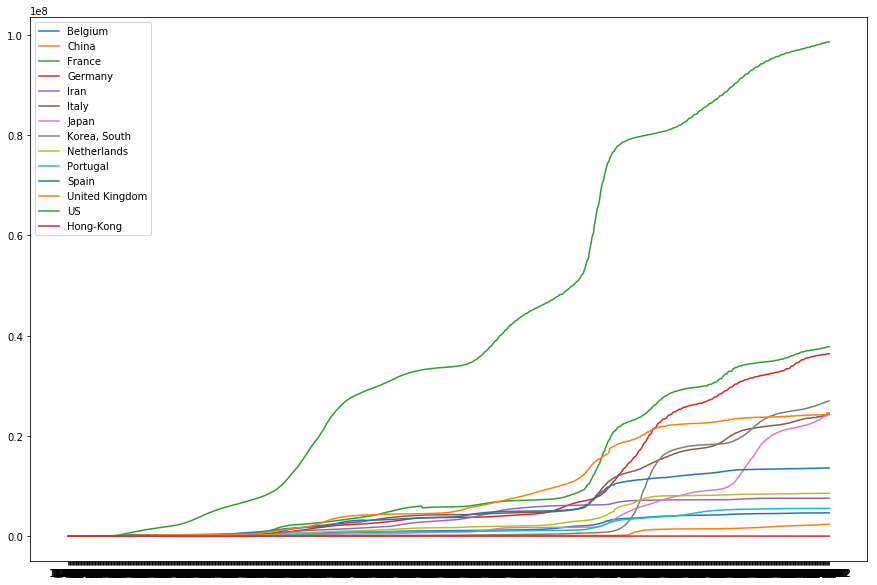

In [56]:
plt.rcParams['figure.figsize'] = [15, 10]

for key in dict_cases:
    print(key)
    y = []
    for day in dict_cases[key]:
        y.append(dict_cases[key][day])
    plt.plot(x,y, label = key)
    
print("")
plt.yscale("log")
plt.legend()
plt.show()

##### Echelle logarithmique

Belgium
China
France
Germany
Iran
Italy
Japan
Korea, South
Netherlands
Portugal
Spain
United Kingdom
US
Hong-Kong



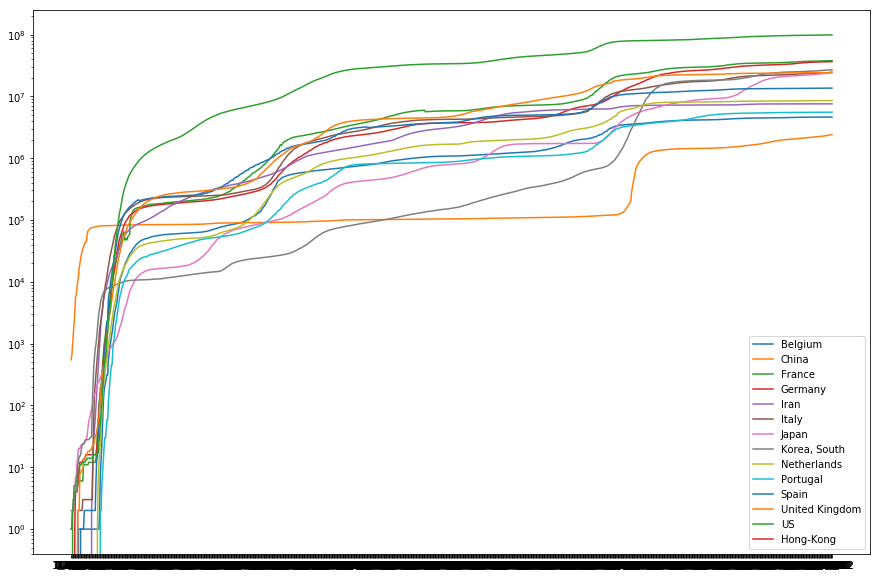

In [58]:
plt.rcParams['figure.figsize'] = [15, 10]

for key in dict_cases:
    print(key)
    y = []
    for day in dict_cases[key]:
        y.append(dict_cases[key][day])
    plt.plot(x,y, label = key)
    
print("")
plt.yscale("log")
plt.legend()
plt.show()